## Introduction

Now that we've completed the course, and we've all become highly adept at creating visualizations with matplotlib, we're ready to start looking at some libraries that will compliment our new skills. And, if there's one package that I could recommend to anyone using matplotlib, it would be the [seaborn][1] statistical data visualization library.

The seaborn library was built with matplotlib at its core, and it acts as a powerful complement to it, rather than a replacement, and in this lesson we'll get a quick overview of seaborn and see how it can be used to make our lives easier when working with matplotlib.

So, let's setup our notebook and get started.

[1]: http://stanford.edu/~mwaskom/software/seaborn/

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Silence a deprecation warning with the current versions of 
# seaborn and matplotlib available in Anaconda.
import warnings
warnings.simplefilter(action="ignore", category=Warning)

## What is Seaborn?

As we've already seen time-and-time again, matplotlib makes it possible for you to visualize your data---it doesn't have an opinion on how you should visualize it, it just gives you the tools to do so. Seaborn, on the other hand, bills itself as a statistical data visualization package, and it strives to give you ["a high-level interface for drawing attractive statistical graphics"][1].

### Better Looking Defaults

So, let's break down that last sentece a bit, starting with the attractive part. As an example, let's take a look at a typical matplotlib histogram.

<!--- So, what do I mean when I say that Seaborn is a statistical data visualization package? Well, you can think of it as being at a slightly higher level than matplotlib. Where matplotlib makes it possible for you to visualize your data, it doesn't have an opinion on how you should visualize it, it just gives you the tools to do so. Seaborn, on the other hand, strives to give you ["a high-level interface for drawing attractive statistical graphics"][1]. This means that it does actually have an opinion on what it should show you and it tries to add value to your visualizations based on what it thinks you may want to see given the data and how you are trying to display it. --->



[1]: http://stanford.edu/~mwaskom/software/seaborn/

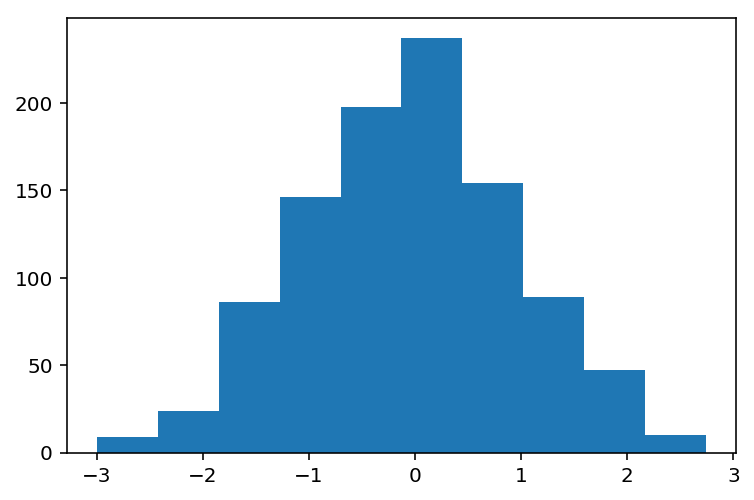

In [2]:
plt.hist(np.random.randn(1000));

There it is, the matplotlib histogram. Boring, some might say unattractive, but useful nonetheless. Now, what if we were to import the seaborn library and run the same `hist` command again, would we get something different this time?

<!--- The histogram above is something we've seen many times in this course. It's simple, not the most attractive, but useful, nonetheless. Now, if we were to import the Seaborn library and run the same `hist` command again, we would get something a little different. --->

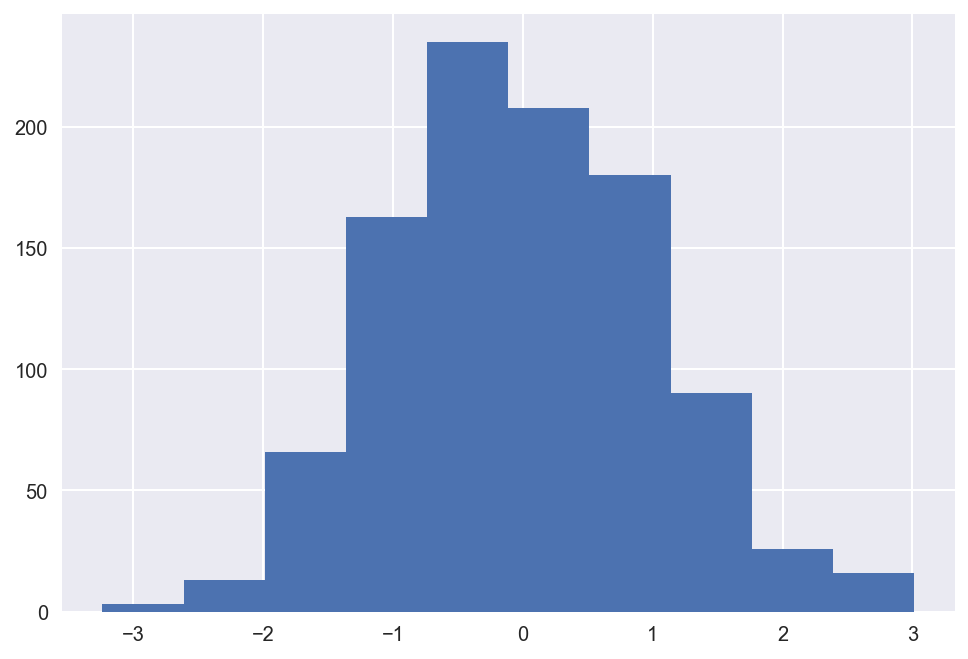

In [3]:
import seaborn as sns
plt.hist(np.random.randn(1000));

You bet!

By simply importing the library, seaborn has added some sensible defaults to make matplotlib a bit more aesthetically pleasing. That said, we've already seen how to customize matplotlib's appearance with style sheets, and we've seen that matplotlib actually comes with some decent styles built right in, so just getting more attractive plots hardly makes this library worth installing, right?

Well, you're absolutely correct! If all we were using seaborn for was a slightly more attractive set of plots, we'd be missing out on seaborn's real power. Instead, let's concentrate on the rest of our earlier description of seaborn, specifically the "high-level interface for [...] statistical graphics" portion. 

### A High-Level Interface for Statistical Graphics

Where seaborn really differs from pure matplotlib is that it adds a new, much more opinionated API that allows the user to create, with just a minimal amount of code, much more informative graphics. The nice thing about seaborn, is that it will try to take care of common tasks for you that it thinks you'll either need, or want to do yourself.

To drive this point home, let's take a look at an example. 

In the next cell, we'll plot the same histogram as the one we just did above, but this time, we'll use seaborn's `distplot` function instead.

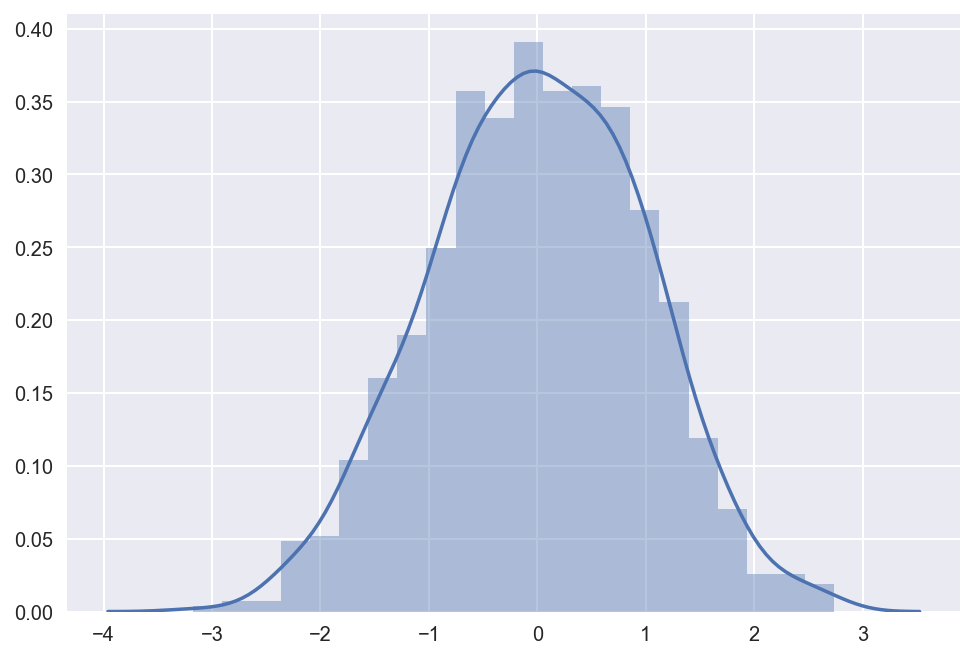

In [4]:
sns.distplot(np.random.randn(1000));

Now, we can start to see the advantages of using seaborn over just plain vanilla matplotlib. By calling the `distplot` function in place of the standard `hist` function, we get two new features added to our plot. 

First, you'll probably notice a nice smooth line that shows the general shape of our data's distribution. When you call the [`distplot`][1] function, seaborn combines the output of the normal matplotlib `hist` function with that of seaborn's own `kdeplot` function, which performs a [kernel density estimation][2], and as you can see from the graph above, plots the resultant curve showing the general shape of our data's distribution. 

Second, you should have noticed that the number of bins is greater than the number in our histograms above, in fact, it looks to be at least double the amount of bins, if not more. That's because seaborn performs a [calculation to automatically determine the best default bin size][3] for us. Normally, we'd have to perform this task ourselves, but seaborn has thought ahead, and has already taken care of this mundane chore for us.

The nice thing about the seaborn library is that not only does it create aesthetically pleasing visualizations for us, but internally, it's also trying to perform useful aggregations and statistical-model fittings to produce more information-dense plots overall.

So, what do you say we take a look at another example? 

## Finding Correlations in Real Data

To do so, we'll need some data that's a little more meaningful than just some randomly generated data. Luckily, the seaborn library provides a handful of sample datasets that we can use to test out some of seaborn's extensive API. To load one of these datasets, we simply need to call the `load_dataset` function and pass in the name of the dataset to load. In our next example, we'll use seaborn's `'car_crashes'` dataset to see if there's any correlation between alcohol usage and car accidents. So, let's load that datatset in now.

[1]: http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot
[2]: https://en.wikipedia.org/wiki/Kernel_density_estimation
[3]: https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

In [5]:
crashes = sns.load_dataset('car_crashes')

The `load_dataset` function returns a `DataFrame` object which is a data structure provided by the pandas library. We'll learn more about this library, and its ubiquitous data structure, in the next lesson, but for now, if it helps, you can just think of it as a 2-dimensional, tabular structure similar to an Excel spreadsheet. 

Now, to quickly check for a possible correlation between alcohol consumption and total number of car crashes, we can plot these two dimensions on a scatter plot. To do so with seaborn, we'll call the `regplot` function, and we'll pass in three pieces of information: the names of the columns in our `DataFrame` object that hold the data for the x- and y-axes, and the `DataFrame` object itself, and we pass each of these in as the `x`, `y`, and `data` parameters respectively. Let's go ahead and do that now to see a scatter plot of our data.

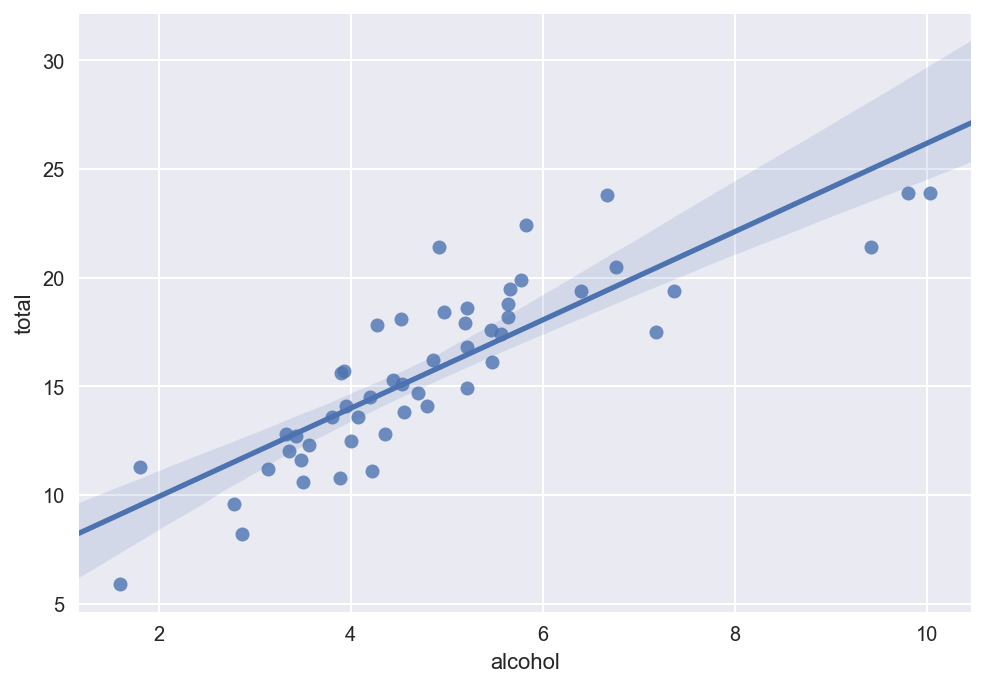

In [6]:
sns.regplot(x="alcohol", y="total", data=crashes);

Wow, seaborn's [`regplot`][1] function not only plots our data, but it also fits a linear regression model, and displays its output and its confidence interval, in the same scatter plot. This is why I love seaborn! It's always thinking ahead and giving me exactly what I want without any extra work on my part.

Now, before we move on, let's take one more look at our car crash dataset with another seaborn plotting function. This time, we'll use the [`jointplot`][2] function. The call to the `jointplot` function below should look nearly identical to the `regplot` call in the previous cell. The only difference, aside from the function name, is the `kind` parameter. Just like `regplot` function, `jointplot` will also perform a regression on our data, but we need to specify the kind of regression to run, and since we want the output to be comparable to our previous plot, we'll set the `kind` parameter to `'reg'` to tell the `jointplot` function to perform a linear regression.

[1]: http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.regplot.html#seaborn.regplot
[2]: http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot

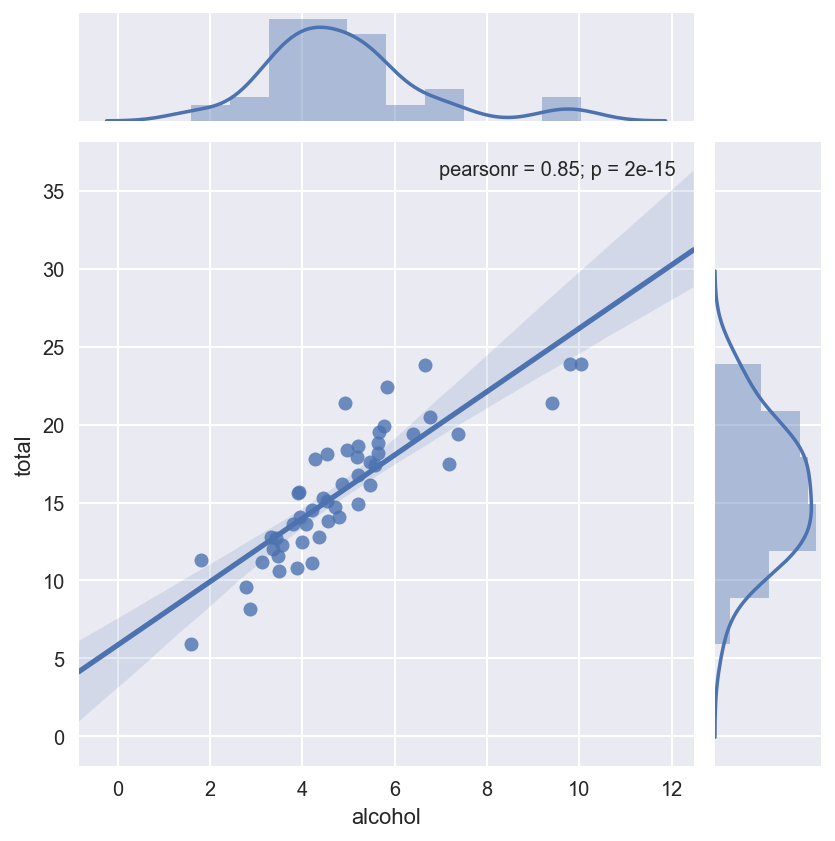

In [7]:
sns.jointplot(x='alcohol', y='total', data=crashes, kind='reg');

As you can see, the `jointplot` function contains the same scatter plot and regression line that the `regplot` function gave us, but now we're also getting histograms and kernel density estimates for each individual dimension in the scatter plot. In addition, in the upper right corner of the main graph we see two very important statistics. 

The first, is the [Pearson correlation coefficient (PCC)][1], which is a statistic for estimating the linear relationship between two variables. A PCC of 0.85, like we have here, suggests a very strong positive relationship between each variable, i.e., as the amount of alcohol consumed goes up, so too do the number of car crashes. The second number is the [p-value][2], and it measures the probability that the relationship we're seeing between these two variables is due to pure random chance. So, the lower the p-value, the more likely the relationship we're seeing is real, and not just a product of dumb luck, and since our p-value is extremely low, it's probably pretty safe to say that a very real relationship exists between alcohol usage and number of car crashes.

Now, a visualization such as this one is extremely valuable to anyone searching for insights in a dataset. Let's just breakdown what exactly happened in the last cell so we're all on the same page with respect to just how powerful a command like `jointplot` really is. 

First, we came up with a hypothesis that we wanted to test, specifically increased alcohol consumption leads to more automotive accidents. Then, in just a single line of code, we were able test that hypothesis, display the results of the test in the form of a pair of statistics (i.e., the Pearson correlation coefficient and the p-value), and visualize the relationship between the two variables using both a scatter plot, and a linear regression model. With just plain ole matplotlib, we would've had to do a lot of this work ourselves to produce the exact same set of results.

In short, where matplotlib makes it easy to analyze our data visually, seaborn makes it easy to analyze our data in a much more rigorously statistical manner.

## Scatterplot Matrix (redux)

Now, before we end this lesson, I want to take a look at one more extremely useful seaborn plotting function. If you'll remember all the way back to the chapter on `pyplot`, in the very last lesson of that chapter, we created a function to display a scatterplot matrix. That function, while conceptually simple, wasn't necessarily small, and it took a decent amount of work to create that visualization. Of course, the upside to all of that work was that it gave us a function that allowed us to get a very high-level overview of our data with just a single line of code. Well, just like we've seen in the last few examples, the seaborn library specializes in giving us high-level functions that provide powerful views into our data, and one of those functions, the [`pairplot`][3] function, just happens to produce a scatterplot matrix. Let's go ahead and call it now to see how it compares to the one we created earlier in the course.

To call the `pairplot` function, we first need to load in the [Iris][4] dataset, since that's what we used in the scatterplot matrix lesson, and we'll once again, take advantage of seaborn's `load_dataset` function to do so.

[1]: https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient
[2]: https://en.wikipedia.org/wiki/P-value
[3]: http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot
[4]: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [8]:
iris = sns.load_dataset('iris')

 Then, we simply call the `pairplot` function, pass in our dataset, and a parameter named `hue` that takes the name of our dataset's target variable.

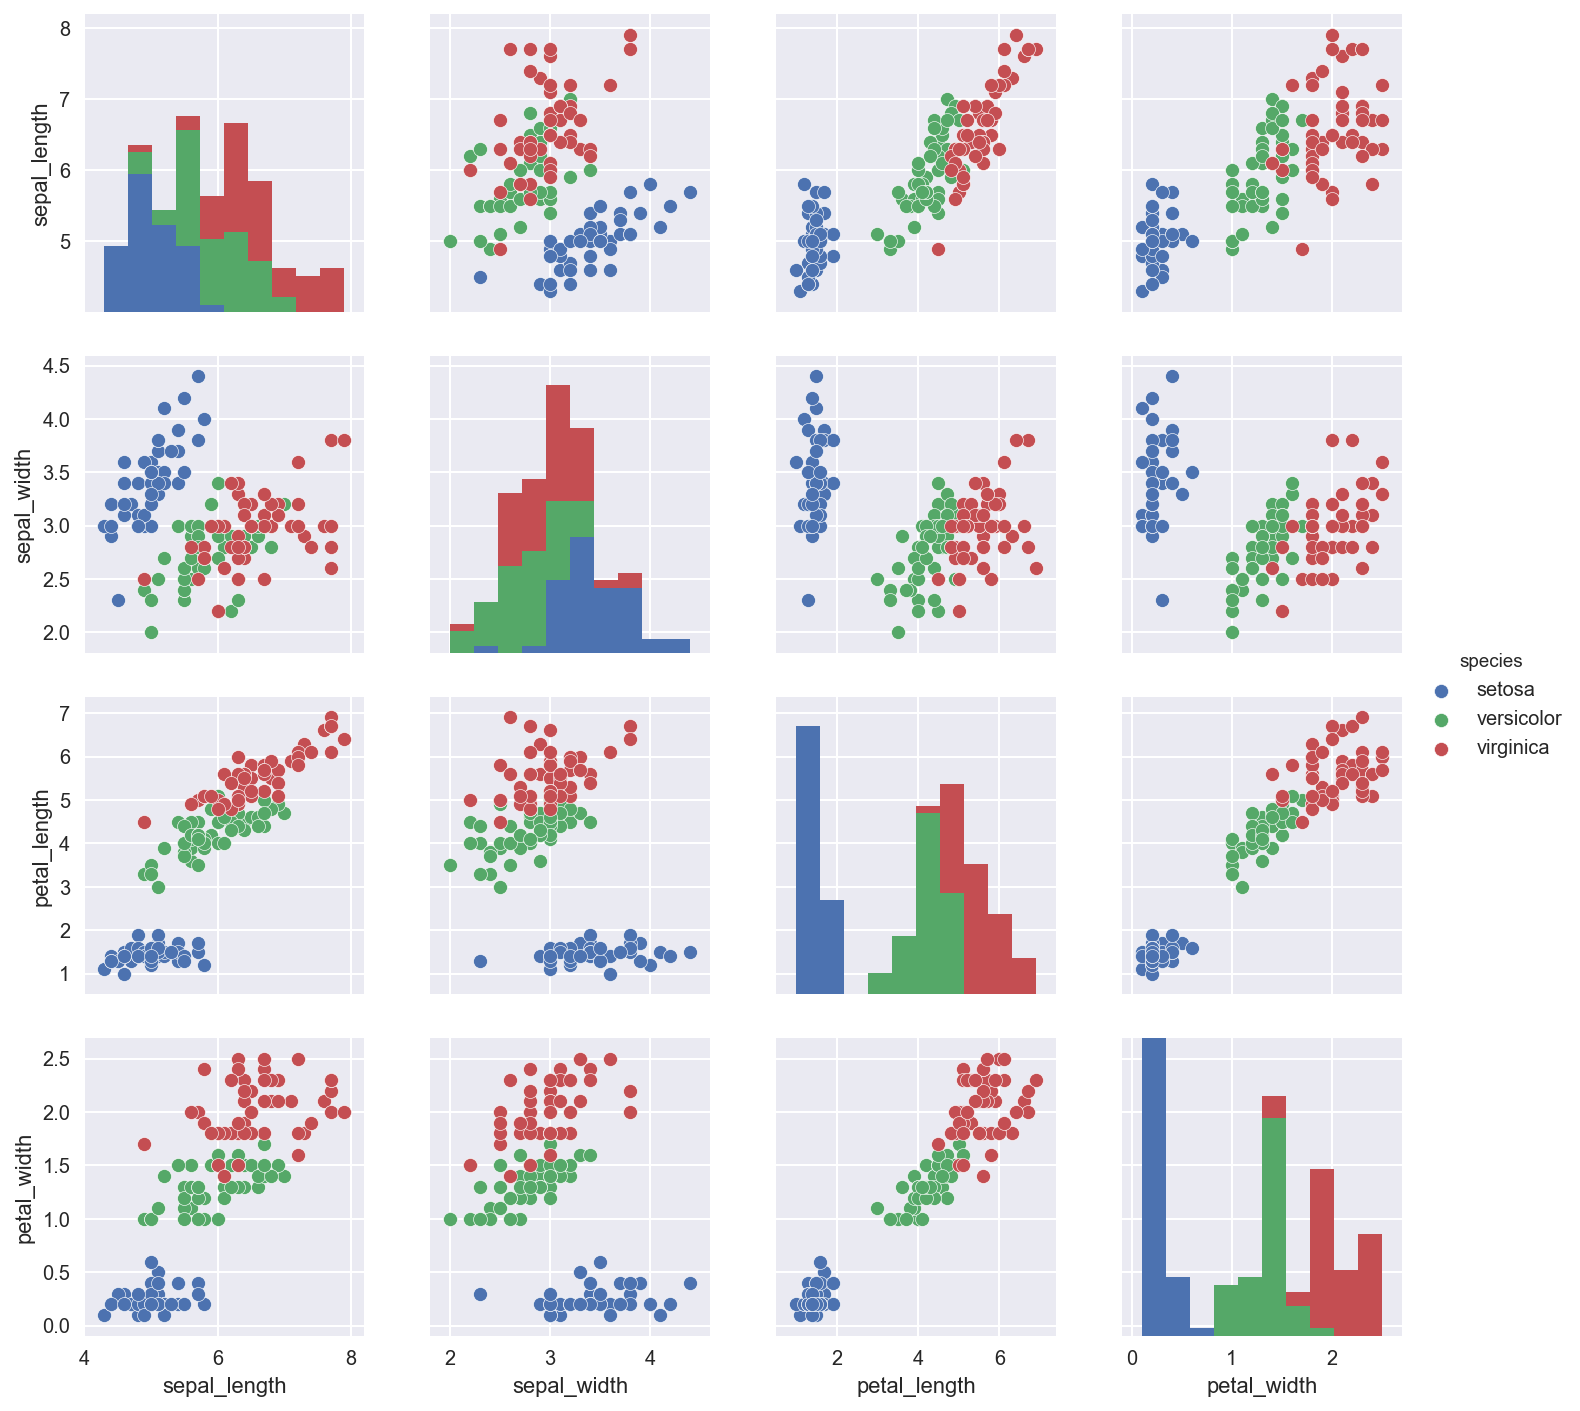

In [9]:
sns.pairplot(iris, hue='species');

And, that's it, we have a beautiful, and useful scatterplot matrix, without all the hard work that we had to put in before when we were working with just the matplotlib library.

## Conclusion

Now, seaborn is one of those libraries that you see people of differing experience levels using for different reasons. If you're new to matplotlib, and everything still seems a bit magical to you, and you don't have a clue as to how to use a style sheet, much less create one of your own, you probably picked up seaborn because, frankly, it makes matplotlib look good. Those of us who have a bit more experience though, tend to appreciate seaborn for what it really is, a fantastic complement to the matplotlib library that makes the performance of statistical analyses on a dataset relatively easy. The main thing to remember about seaborn is that it doesn't want to replace matplotlib, instead it wants to enhance it. With that in mind, the best way for me to end this lesson is just to repeat my comment from the introduction: "...if there's one package that I could recommend to anyone using matplotlib, it would be seaborn." So, what are you waiting for, go out and learn it! 